In [22]:
import pandas as pd
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 1366
png_renderer.height = 600
pio.renderers.default = 'png'
df = pd.read_csv('Sunspots.csv', sep=',')
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [23]:
df.shape

(3265, 3)

In [24]:
sunspots = df.iloc[:, 2]
sunspots

0        96.7
1       104.3
2       116.7
3        92.8
4       141.7
        ...  
3260      0.6
3261     14.4
3262     34.0
3263     21.8
3264     10.4
Name: Monthly Mean Total Sunspot Number, Length: 3265, dtype: float64

In [25]:
rolling_mean = pd.DataFrame(sunspots).rolling(window=25).mean()
rolling_mean

,Monthly Mean Total Sunspot Number
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3260,3.700
3261,4.144
3262,5.308
3263,5.984


In [26]:
alpha = 0.25
result = [sunspots[0]]
for i in range(1, len(sunspots)):
    result.append(alpha * sunspots[i] + (1 - alpha) * result[i - 1])
result = pd.Series(result)
result

0        96.700000
1        98.600000
2       103.125000
3       100.543750
4       110.832813
           ...    
3260      3.713450
3261      6.385088
3262     13.288816
3263     15.416612
3264     14.162459
Length: 3265, dtype: float64

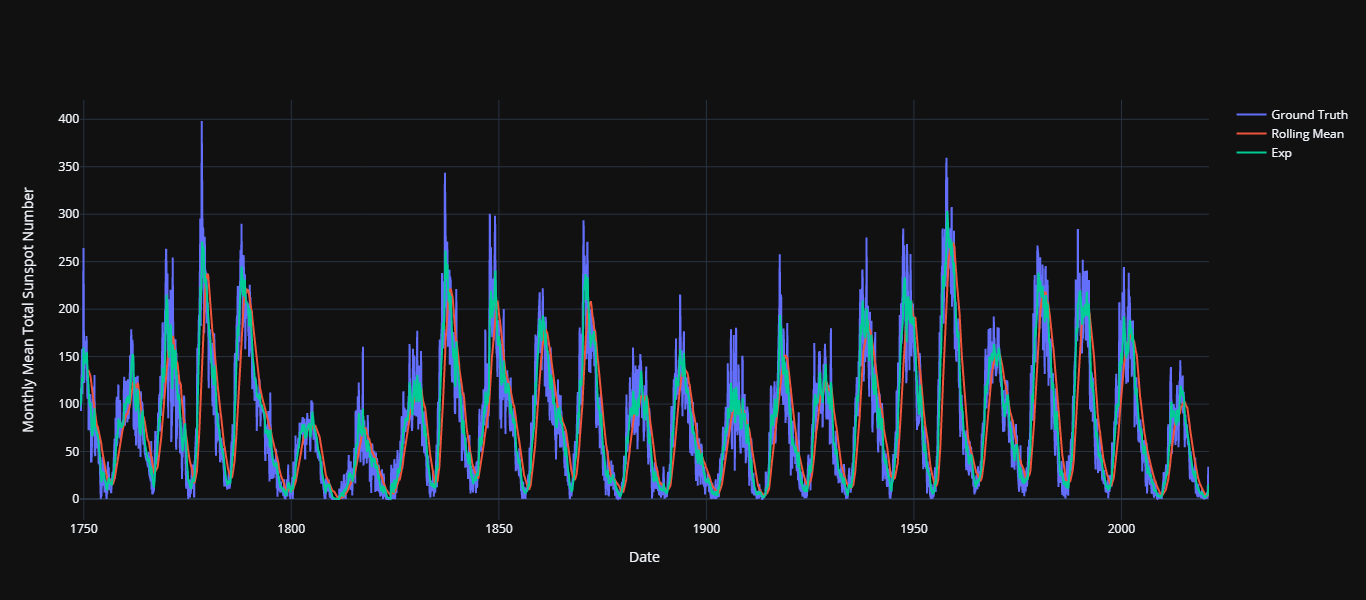

In [27]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Monthly Mean Total Sunspot Number'],
                         mode='lines',
                         name='Ground Truth'))
fig.add_trace(go.Scatter(x=df['Date'], y=rolling_mean['Monthly Mean Total Sunspot Number'],
                         mode='lines',
                         name='Rolling Mean'))
fig.add_trace(go.Scatter(x=df['Date'], y=result,
                         mode='lines',
                         name='Exp'))
fig.update_layout(xaxis_title='Date', yaxis_title='Monthly Mean Total Sunspot Number')
fig.show()